# initializations

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

In [39]:
# load datasets
df = pd.read_excel('ABTest.xls')

In [11]:
# quick check the dataframe with head and info
df.head()


,group,action
0,experiment,view
1,control,view
2,control,view and click
3,control,view and click
4,control,view


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3757 entries, 0 to 3756
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   group   3757 non-null   object
 1   action  3757 non-null   object
dtypes: object(2)
memory usage: 58.8+ KB


## set up hypothesis testing

In [16]:
df['group'].value_counts()

experiment    1881
control       1876
Name: group, dtype: int64

In [17]:
df['action'].value_counts()

view              3082
view and click     675
Name: action, dtype: int64

# experiment group = group that received the new input
# control    group = group that did not receive the new input
# CTR = number of clicks advertisers receive on their ads per number of impressions ( No. of impressions = No. of views (click and no click) )

Hypothesis testing steps: (1) specify null hypothesis (2) specify alternate hypothesis (3) Set significance level (4) Calculate corresponding p-value (5) Draw conclusion

Setting the is significance level is setting the confidence in rejecting the null hypothesis
If significance level is set at 0.05, it means that the null hypothesis is rejected at 95% confidence

P-value is the probability of observing the statistic if the null hypothesis is true

Null Hypothesis H0: The click through rate associated with the new ad is less than that associated with the old ad,
which means that the old ad is better than than new one
Alternate Hypothesis H1: CTR_new_ad > CTR_old_ad : New ad is better

In [23]:
# get dataframe with all observations from control group
control_df = df.query('group=="control"')
control_CTR = control_df.query('action=="view and click"').index.nunique()/control_df.index.nunique()
control_CTR

0.19349680170575692

In [24]:
# get dataframe with all observations from exp group
experiment_df = df.query('group=="experiment"')
experiment_CTR = experiment_df.query('action=="view and click"').index.nunique()/experiment_df.index.nunique()
experiment_CTR

0.16586921850079744

In [25]:
# get difference in CTR for both groups
diff_CTR = experiment_CTR - control_CTR

In [29]:
#bootstraping
differences=[]
size=df.shape[0]
for I in range(10000):
    sample=df.sample(size, replace=True)
    control_df = sample.query('group=="control"')
    control_CTR = control_df.query('action=="view and click"').index.nunique()/control_df.index.nunique()
    experiment_df = sample.query('group=="experiment"')
    experiment_CTR = experiment_df.query('action=="view and click"').index.nunique()/experiment_df.index.nunique()
    diff_CTR = experiment_CTR - control_CTR
    differences.append(diff_CTR)
    

central limit
theorem states that if you have a population with the mean 
and standard deviation Sigma and take sufficiently large random
samples from the population with replacement, then
the distribution of the sample means would be approximately
normally distributed.

(array([  22.,  140.,  664., 1721., 2755., 2632., 1465.,  503.,   89.,
           9.]),
 array([-0.06209659, -0.05504038, -0.04798418, -0.04092797, -0.03387176,
        -0.02681555, -0.01975934, -0.01270314, -0.00564693,  0.00140928,
         0.00846549]),
 <BarContainer object of 10 artists>)

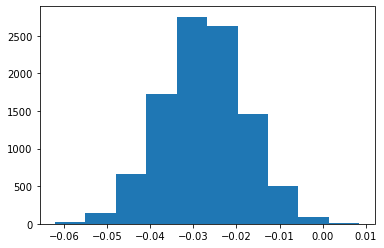

In [30]:
#plot sampling distribution
differences=np.array(differences)
plt.hist(differences)

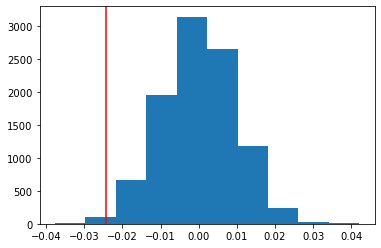

In [35]:
#simulate distribution under null hypothesis
null_hypothesis=np.random.normal(0,differences.std(),differences.size)

#plot the null distribution
plt.hist(null_hypothesis)
plt.axvline(diff_CTR,c='red')

In [36]:
# compute P-value
(null_hypothesis>diff_CTR).mean()

0.9942

P value is the probability of observing your statistic if the null hypothesis is true.
Confidence  level = 1 - alpha = 95%
if the P-value < 0.05,  we are 95% confident that we can reject the null hypothesis.
The P value is 0.9986: We fail to reject the null hypothesis.

A p-value less than 0.05 (typically ≤ 0.05) is statistically significant. ... A p-value higher than 0.05 (> 0.05) is not statistically significant and indicates strong evidence for the null hypothesis. This means we retain the null hypothesis and reject the alternative hypothesis.